<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://meteofrance.fr/" ><img src="photo.jpg" style="float:right; max-width: 120px; display: inline"  alt="MétéoFrance"/></a>


</center>

# Projet Recherche et Innovation, par Eva Marques, Aleksi Timonen, et Solange Pruilh
# Tuteur : M. Philippe Besse

# Deuxième Partie :  
# A- Prévision de la nébulosité (Méteo-France )  en <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> avec <a href="http://scikit-learn.org/stable/#"><img src="http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" style="max-width: 100px; display: inline" alt="Scikit-Learn"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time

%matplotlib inline
path=""
data=pd.read_csv(path+"data.dat",sep=",",header=0)

# 1.Transformation des données

In [3]:
data["ddfH1000"]=pd.Categorical(data["ddfH1000"], ordered=False)
data["mois"]=pd.Categorical(data["mois"], ordered=False)
del data["fllat3SOL0"]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564740 entries, 0 to 564739
Data columns (total 19 columns):
nebsat         564740 non-null float64
lat            564740 non-null float64
lon            564740 non-null float64
flevap3SOL0    564740 non-null float64
flir3SOL0      564740 non-null int64
huH2           564740 non-null float64
nbSOL0         564740 non-null float64
nhSOL0         564740 non-null float64
nmSOL0         564740 non-null float64
ntSOL0         564740 non-null float64
ntSOL0em3      564740 non-null float64
ntSOL0ep3      564740 non-null float64
pMER0          564740 non-null float64
tH2            564740 non-null float64
tH2VGRAD       564740 non-null float64
ffH1000        564740 non-null float64
ddfH1000       564740 non-null category
mois           564740 non-null category
ep_opt         564740 non-null float64
dtypes: category(2), float64(16), int64(1)
memory usage: 74.3 MB


In [5]:
data.describe(include='all')

,nebsat,lat,lon,flevap3SOL0,flir3SOL0,huH2,nbSOL0,nhSOL0,nmSOL0,ntSOL0,ntSOL0em3,ntSOL0ep3,pMER0,tH2,tH2VGRAD,ffH1000,ddfH1000,mois,ep_opt
count,564740.000000,564740.000000,564740.000000,564740.000000,5.647400e+05,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740.000000,564740,564740.0,564740.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,12.0,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W,1.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240077,68816.0,NaN
mean,4.820920,46.250000,2.250000,-0.474936,-7.054922e+05,73.361713,2.423189,2.944474,1.711338,4.644797,4.413124,4.478390,1017.555260,-6.796411,13.877164,8.667317,NaN,NaN,1278.916073
std,3.309194,3.172147,4.905359,0.435597,4.230117e+05,18.959685,2.941553,3.056662,2.503308,3.092112,3.109472,3.087216,8.642153,3.802129,7.575208,5.741393,NaN,NaN,1849.609539
min,0.000000,41.000000,-6.000000,-7.233536,-2.056832e+06,7.258479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,966.248100,-14.895390,-24.211680,0.009301,NaN,NaN,0.000000
25%,0.800000,43.500000,-2.000000,-0.698425,-1.041953e+06,61.178563,0.000000,0.000000,0.000000,1.500000,1.187500,1.312500,1012.591900,-9.593079,9.130487,4.325734,NaN,NaN,40.968058
50%,5.920000,46.250000,2.250000,-0.340012,-7.548240e+05,77.096078,0.875000,1.750000,0.062500,5.375000,4.812500,4.937500,1017.729400,-7.312012,13.938490,7.461597,NaN,NaN,535.566500
75%,8.000000,49.000000,6.500000,-0.147980,-3.342880e+05,88.911598,4.562500,5.937500,2.812500,7.875000,7.750000,7.750000,1023.106300,-4.551926,18.957670,11.772847,NaN,NaN,1685.488500


In [6]:
from math import sqrt,log
data["Sq_huH2"]=data["huH2"].map(lambda x: x**2)
data["sqrt_ffH1000"]=data["ffH1000"].map(lambda x: sqrt(x))
data["sq_tH2"]=data["tH2"].map(lambda x : x**2)
data["sq_tH2VGRAD"]=data["tH2VGRAD"].map(lambda x : x**2)
data["nbSOL0:ep_opt"]=data["nbSOL0"]*data["ep_opt"]
del data["huH2"]
del data["ffH1000"]

data["nebsat"]=data["nebsat"].map(lambda x: 100*x/8)
data["ntSOL0"]=data["ntSOL0"].map(lambda x: 100*x/8)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564740 entries, 0 to 564739
Data columns (total 22 columns):
nebsat           564740 non-null float64
lat              564740 non-null float64
lon              564740 non-null float64
flevap3SOL0      564740 non-null float64
flir3SOL0        564740 non-null int64
nbSOL0           564740 non-null float64
nhSOL0           564740 non-null float64
nmSOL0           564740 non-null float64
ntSOL0           564740 non-null float64
ntSOL0em3        564740 non-null float64
ntSOL0ep3        564740 non-null float64
pMER0            564740 non-null float64
tH2              564740 non-null float64
tH2VGRAD         564740 non-null float64
ddfH1000         564740 non-null category
mois             564740 non-null category
ep_opt           564740 non-null float64
Sq_huH2          564740 non-null float64
sqrt_ffH1000     564740 non-null float64
sq_tH2           564740 non-null float64
sq_tH2VGRAD      564740 non-null float64
nbSOL0:ep_opt    564740 non-

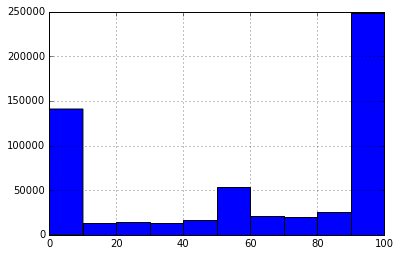

In [7]:
data["nebsat"].hist()
plt.show()

In [8]:
def classes(x):
    y=x
    y[(y<=10) & (y>0)]=2
    y[(y>10) & (y<=25)]=3
    y[(y>25) & (y<=50)]=4
    y[(y>50) & (y<=75)]=5
    y[y>75]=6
    y[y==0]=1
    return y

In [9]:
neb=data["nebsat"][ : :]
nebC=classes(neb)
data["nebsatC"]=nebC
del data["nebsat"]
nebsat=data.iloc[:,21]
data.drop(data.columns[[21]], axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564740 entries, 0 to 564739
Data columns (total 21 columns):
lat              564740 non-null float64
lon              564740 non-null float64
flevap3SOL0      564740 non-null float64
flir3SOL0        564740 non-null int64
nbSOL0           564740 non-null float64
nhSOL0           564740 non-null float64
nmSOL0           564740 non-null float64
ntSOL0           564740 non-null float64
ntSOL0em3        564740 non-null float64
ntSOL0ep3        564740 non-null float64
pMER0            564740 non-null float64
tH2              564740 non-null float64
tH2VGRAD         564740 non-null float64
ddfH1000         564740 non-null category
mois             564740 non-null category
ep_opt           564740 non-null float64
Sq_huH2          564740 non-null float64
sqrt_ffH1000     564740 non-null float64
sq_tH2           564740 non-null float64
sq_tH2VGRAD      564740 non-null float64
nbSOL0:ep_opt    564740 non-null float64
dtypes: category(2), float64

On normalise les variables explicatives quantitatives, avant de les concaténer avec les variables explicatives qualitatives.

In [10]:
from sklearn.preprocessing import StandardScaler 
nebsatDum=pd.get_dummies(data[["mois","ddfH1000"]])
nebsatQuant=data[["lat","lon","flevap3SOL0","flir3SOL0","Sq_huH2","nbSOL0","nhSOL0","nmSOL0","ntSOL0","ntSOL0em3","ntSOL0ep3","pMER0","tH2","tH2VGRAD","sqrt_ffH1000","ep_opt","sq_tH2","sq_tH2VGRAD","nbSOL0:ep_opt"]]

scaler = StandardScaler()  
scaler.fit(nebsatQuant)  
nebsatQuant = scaler.transform(nebsatQuant) 
nebsatQuant=pd.DataFrame(nebsatQuant,columns=[["lat","lon","flevap3SOL0","flir3SOL0","Sq_huH2","nbSOL0","nhSOL0","nmSOL0","ntSOL0","ntSOL0em3","ntSOL0ep3","pMER0","tH2","tH2VGRAD","sqrt_ffH1000","ep_opt","sq_tH2","sq_tH2VGRAD","nbSOL0:ep_opt"]])

data=pd.concat([nebsatDum,nebsatQuant],axis=1)


In [11]:
scaler = StandardScaler()  
scaler.fit(nebsatQuant)  
nebsatQuant = scaler.transform(nebsatQuant) 

In [12]:
data.head()

,mois_1,mois_2,mois_3,mois_4,mois_5,mois_6,mois_7,mois_8,mois_9,mois_10,...,ntSOL0em3,ntSOL0ep3,pMER0,tH2,tH2VGRAD,sqrt_ffH1000,ep_opt,sq_tH2,sq_tH2VGRAD,nbSOL0:ep_opt
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.093234,0.958505,0.758532,0.542294,-1.153055,-0.738160,0.862178,-0.833710,-1.028974,0.966624
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.590736,1.140708,0.751589,0.538184,-1.167493,-0.647254,1.915048,-0.830478,-1.034098,2.146143
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.952534,1.120464,0.765474,0.645032,-1.260313,-0.829672,2.315028,-0.911043,-1.064406,2.528275
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.153533,1.039484,0.740018,0.550513,-1.287127,-0.300753,1.742455,-0.840141,-1.072314,1.874465
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.153533,1.120464,0.683319,0.147777,-1.371696,0.018675,2.498616,-0.474907,-1.094767,2.713157


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564740 entries, 0 to 564739
Data columns (total 36 columns):
mois_1           564740 non-null float64
mois_2           564740 non-null float64
mois_3           564740 non-null float64
mois_4           564740 non-null float64
mois_5           564740 non-null float64
mois_6           564740 non-null float64
mois_7           564740 non-null float64
mois_8           564740 non-null float64
mois_9           564740 non-null float64
mois_10          564740 non-null float64
mois_11          564740 non-null float64
mois_12          564740 non-null float64
ddfH1000_C       564740 non-null float64
ddfH1000_E       564740 non-null float64
ddfH1000_N       564740 non-null float64
ddfH1000_S       564740 non-null float64
ddfH1000_W       564740 non-null float64
lat              564740 non-null float64
lon              564740 non-null float64
flevap3SOL0      564740 non-null float64
flir3SOL0        564740 non-null float64
Sq_huH2          564740 non-

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler 

/home/pruilh/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/pruilh/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# 2  $K$ plus proches voisins

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)

In [29]:
#Tests "manuels" du nombre de voisins, avec deux paramètres de poids (pour les voisins)
#weights="uniform" : même pondération pour chaque voisins
#weights="distance" : les voisins les plus proches ont plus d'importance
erreur_array1=np.empty((7, 1))
erreur_array2=np.empty((7, 1))
erreur_arrayr=np.empty((7, 1))
nb_voisins =np.array([5,7,9,11,13,15,17])

for k in range(0,7) :
    knn1 = KNeighborsClassifier(n_neighbors=nb_voisins[k], weights="uniform")
    knn2 = KNeighborsClassifier(n_neighbors=nb_voisins[k], weights="distance")
    knnr= KNeighborsRegressor(n_neighbors=nb_voisins[k], weights="uniform")
    resu_knn1 = knn1.fit(X_train, Y_train)
    resu_knn2 = knn2.fit(X_train, Y_train)
    resu_knnr = knnr.fit(X_train, Y_train)
    erreur_array1[k]=1-resu_knn1.score(X_test,Y_test)
    erreur_array2[k]=1-resu_knn2.score(X_test,Y_test)
    erreur_arrayr[k]=1-resu_knnr.score(X_test,Y_test)


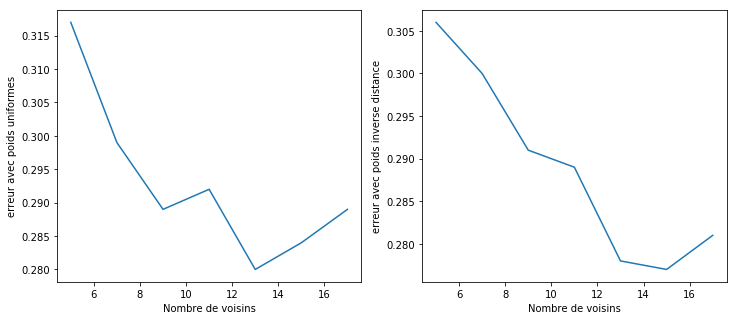

In [33]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.plot(nb_voisins,erreur_array1)
plt.xlabel('Nombre de voisins')
plt.ylabel('erreur avec poids uniformes')

plt.subplot(1,2,2)
plt.plot(nb_voisins,erreur_array2)
plt.xlabel('Nombre de voisins')
plt.ylabel('erreur avec poids inverse distance')

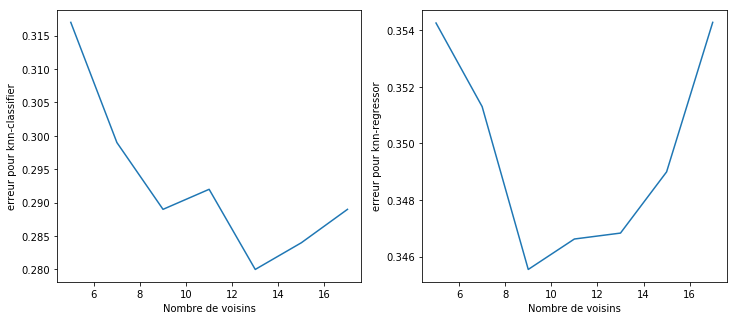

In [32]:
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
plt.plot(nb_voisins,erreur_array1)
plt.xlabel('Nombre de voisins')
plt.ylabel('erreur pour knn-classifier')

plt.subplot(1,2,2)
plt.plot(nb_voisins,erreur_arrayr)
plt.xlabel('Nombre de voisins')
plt.ylabel('erreur pour knn-regressor')

In [76]:
#optimisation du nombre de voisin par validation croisée
essai=3
array_erreur=np.empty((essai,1))
for i in range (essai):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
    param=[{"n_neighbors":list(range(8,19))}]
    tps1 = time.clock()
    knn = GridSearchCV(KNeighborsClassifier(),param,cv=5,n_jobs=-1)
    digit_knn=knn.fit(X_train, Y_train) 
    tps2 = time.clock()
    array_erreur[i]=1-digit_knn.score(X_test,Y_test)
    print(i, "eme essai")
    print ("Meilleur paramètre pour n_neigbors :", digit_knn.best_params_["n_neighbors"])
    print("Temps de validation croisée pour k-nn :",(tps2 - tps1)/60)
    print("Erreur sur échantillon test :", array_erreur[i])

KeyboardInterrupt: 

La validation croisée est trop longue à compiler (plus de 10h) donc nous n'avons pas pu la mettre en place. 

In [ ]:
y_chap = knnOpt.predict(X_test)
# matrice de confusion
table=pd.crosstab(y_chap,Y_test)
print(table)

nebsatC  1.0  2.0  3.0  4.0  5.0  6.0
row_0                                
1.0      177   13   24   60   33   54
2.0        0    0    0    1    0    0
4.0        8    1    2   10    6   13
5.0        1    0    0    0    3    3
6.0       36    5   14   57   61  418


# 3 Random Forest 

In [ ]:
B=3
array_erreur=np.empty((B,1))
erreur_oob_min=np.empty((B,1))
for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=3000)
    erreur_oob=np.zeros(3)
    x=np.linspace(600,750,4,dtype=np.int16)
    erreur_oob_min[i]=400
    indice=0
    for j in range(4):
        tps0 = time.clock()
        rf = RandomForestClassifier(n_estimators=x[j], 
        criterion='gini', max_depth=None, min_samples_split=2, 
        min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
        bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
        rf.fit(X_train,Y_train)
        erreur_oob[j]=1-rf.oob_score_
        print("Erreur oob:", erreur_oob[j],"pour",x[j],"arbres")
        tps1 = time.clock()

        print("Temps de configuration RF :" ,tps1 - tps0)
        if erreur_oob[j]< erreur_oob_min[i] :
            erreur_oob_min[i]=erreur_oob[j]
            indice=j
            array_erreur[i]=1-rf.score(X_test,Y_test)
    print("Meilleur nombre d'arbres:",x[indice])
 

In [ ]:
print ("Tableau des erreurs",array_erreur)


In [ ]:
B=3
array_erreur=np.empty((B,1))
erreur_oob_min=np.empty((B,1))
for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=3000)
    erreur_oob=np.zeros(4)
    x=np.linspace(600,750,4,dtype=np.int16)
    erreur_oob_min[i]=400
    indice=0
    for j in range(4):
        tps0 = time.clock()
        rf = RandomForestRegressor(n_estimators=x[j], 
        criterion='mse', max_depth=None, min_samples_split=2, 
        min_samples_leaf=1, max_features='auto', max_leaf_nodes=None, 
        bootstrap=True, oob_score=True, n_jobs=-1,random_state=None, verbose=0)
        rf.fit(X_train,Y_train)
        erreur_oob[j]=1-rf.oob_score_
        print("Erreur oob:", erreur_oob[j],"pour",x[j],"arbres")
        tps1 = time.clock()

        print("Temps de configuration RF :" ,tps1 - tps0)
        if erreur_oob[j]< erreur_oob_min[i] :
            erreur_oob_min[i]=erreur_oob[j]
            indice=j
            array_erreur[i]=1-rf.score(X_test,Y_test)
    print("Meilleur nombre d'arbres:",x[indice])
 

In [ ]:
print ("Tableau des erreurs",array_erreur)

# 4 Multi-layer Perceptron Classifier

In [ ]:
B=3
paramGrid=[{"hidden_layer_sizes":list([(400,),(300,)(200,)])}]
array_erreur=np.empty((B,1))
for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
    
    
    
    nnet=GridSearchCV(MLPClassifier(max_iter=500),paramGrid,cv=5,n_jobs=-1,refit=True).fit(X_train,Y_train)
    print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnet.best_score_,nnet.best_params_))
   
    # code a exécuter pour tester rapidement des valeurs de nos paramètres
    
    
    #nnet=MLPClassifier(hidden_layer_sizes=400)
    #neb_nnet=nnet.fit(X_train,Y_train)
    #array_erreur[i]=1-neb_nnet.score(X_test,Y_test)

    #array_erreur[i]=1-nnet.score(X_test,Y_test)
    
    
    

In [ ]:
print ("Tableau des erreurs",array_erreur)

Test avec activation= logistic

In [ ]:
B=3
paramGrid=[{"hidden_layer_sizes":list([(300,),(400,),(200,)])}]
array_erreur=np.empty((B,1))
for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
    
    
    nnet=GridSearchCV(MLPClassifier(max_iter=500,activation='logistic'),paramGrid,cv=5,n_jobs=-1,refit=True).fit(X_train,Y_train)
    print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnet.best_score_,nnet.best_params_))
    
    array_erreur[i]=1-nnet.score(Xnet_test,Y_test)
print ("Tableau des erreurs",array_erreur)

In [ ]:
print ("Tableau des erreurs",array_erreur)

On change le solver, testant maintenant avec "adam".

In [ ]:
B=3
paramGrid=[{"hidden_layer_sizes":list([((160,),(120,),(140),(180,),(200,))])}]
array_erreur=np.empty((B,1))
for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
    nnet=GridSearchCV(MLPClassifier(max_iter=500,solver='adam'),paramGrid,cv=5,n_jobs=-1,refit=True)
    digit_nnet=nnet.fit(X_train,Y_train)
    print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnet.best_score_,nnet.best_params_))
    
    array_erreur[i]=1-digit_nnet.score(X_test,Y_test)

print ("Tableau des erreurs",array_erreur)

In [ ]:
B=3
paramGrid=[{"hidden_layer_sizes":list([((100,),(200,),(300,))])}]
array_erreur=np.empty((B,1))
for i in range (B):
    X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
    nnet=GridSearchCV(MLPRegressor(max_iter=500),paramGrid,cv=5,refit=True).fit(X_train,Y_train)
    digit_nnet=nnet.fit(X_train,Y_train)
    print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - nnet.best_score_,nnet.best_params_))
    
    array_erreur[i]=1-digit_nnet.score(X_test,Y_test)

print ("Tableau des erreurs",array_erreur)

In [20]:
 X_train,X_test,Y_train,Y_test=train_test_split(data,nebsat,test_size=1000)
nnet=MLPRegressor(hidden_layer_sizes=400)
digit_nnet=nnet.fit(X_train,Y_train)
print (1-digit_nnet.score(X_test,Y_test))

0.406774734765
